<a href="https://colab.research.google.com/github/debbiedebdeb/Algorithm/blob/master/E_commerce_%EA%B3%A0%EA%B0%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고객 데이터 분석을 통해 어떤 인사이트를 알 수 있는지 

# E-commerce Data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action = 'ignore')
pd.set_option('display.max_columns', None)

## 데이터 가져오기

In [2]:
meta_df = pd.read_csv('https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_meta_data.csv')
stats_df = pd.read_csv('https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_data.csv')

## 데이터 둘러보기

#### [User metadata 컬럼 명세서]  

컬럼명 | 설명
--- | ---
user_id | 고객 고유 ID
sex | 성별 (0:남, 1:여)
birthday_year | 생일년도 (yyyy)
membership_type | 멤버십 타입 (100:비회원, 300-500:정회원)
category_prefer | 카테고리 선호 입력수 (int)
joined_date | 가입일자 (yyyy-mm-dd)
deleted_date | 탈퇴일자 (yyyy-mm-dd)
join_path | 가입경로 (None:일반가입,1:sns가입)
os | os 타입 (IOS, AOS)
recommended_cnt | 친구추천 수 (int)


#### [User stat 컬럼 명세서]  

컬럼명 | 설명
--- | ---
user_id | 고객 고유 ID
membership_type | 멤버십 타입 (100:비회원, 300-500:정회원)
total_order_cnt | 총 거래건수
total_cost | 총 거래금액
avg_coupon_amt | 평균 쿠폰사용 금액
avg_point_amt | 평균 포인트사용 금액
weekly_order_cnt | 주평균 거래건수
monthly_order_cnt | 주평균 거래건수
avg_cost | 평균 거래금액
avg_item_cost | 평균 상품금액
last_date | 마지막 거래일자 (yyyy-mm-dd)


In [3]:
meta_df.shape, stats_df.shape

((3412, 10), (3412, 11))

In [4]:
meta_df.head(4)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2


In [5]:
meta_df.dtypes

user_id             object
sex                  int64
birthday_year        int64
membership_type      int64
category_prefer      int64
joined_date         object
deleted_date        object
join_path          float64
os                  object
recommended_cnt      int64
dtype: object

In [6]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            3407 non-null   object 
 1   membership_type    3412 non-null   int64  
 2   total_order_cnt    3412 non-null   float64
 3   total_cost         3412 non-null   float64
 4   avg_coupon_amt     3412 non-null   float64
 5   avg_point_amt      3412 non-null   float64
 6   weekly_order_cnt   3412 non-null   float64
 7   monthly_order_cnt  3412 non-null   float64
 8   avg_cost           3412 non-null   float64
 9   avg_item_cost      3412 non-null   float64
 10  last_date          3412 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 293.3+ KB


In [7]:
meta_df.joined_date.astype('datetime64')

meta_df.joined_date.min(), meta_df.joined_date.max()

('2016-01-11', '2020-12-31')

## 고객데이터 전처리

1. 성별 - 라벨링  
6. [파생변수] 탈퇴 유무 
2. 연령 - 2021년 기준으로 계산
2. [파생변수] 연령대 - 10단위로 구간화
 * 연령대가 나을까 
 * 초반, 후반으로 나누는게 좋을까? 
4. 가입일수 - 2021년 1월 1일을 기준으로 계산 
5. 가입년수 - 2021년 1월 1일을 기준으로 계산 
6. 가입경로 - 라벨링 



### 시각화를 위해 데이터 복사 

In [8]:
meta_df_eda = meta_df.copy()

### 1.성별 라벨링 

In [9]:
meta_df_eda['sex'] = meta_df_eda['sex'].map(
    {0 : 'M', 1 : 'F'}
)

### 2 탈퇴 유무 라벨링 

In [10]:
# NaT : 회원 , 날짜 : 탈퇴

# types 확인
meta_df_eda.dtypes # > object 형으로 되어있음 

# datetime으로 변환시키기 
meta_df_eda['churn'] = np.where( meta_df_eda['deleted_date'] == 'NaT', 'member', 'churn') 
meta_df_eda.head(3)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn
0,KjIRvUKVTgxGaek,M,1995,300,3,2019-09-09,NaT,NaN,AOS,4,member
1,QWhJIG1fOkhUJzG,F,1995,300,2,2020-04-13,NaT,NaN,AOS,1,member
2,5UD76uKfYNPTliG,F,1999,300,4,2018-12-18,NaT,NaN,AOS,6,member


In [11]:
meta_df_eda['churn'].value_counts( normalize  = True )

member    0.991794
churn     0.008206
Name: churn, dtype: float64

### 3.나이정보 및 연령대 생성 

In [12]:
# 기준 : 2021,1,1 
# birthday_year컬럼과 계산 
meta_df_eda['age'] = 2021 - meta_df_eda['birthday_year'] + 1 
meta_df_eda.head(1)

# 연령대 생성 
meta_df_eda['age_level'] = meta_df_eda['age']//10
meta_df_eda.head(1)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn,age,age_level
0,KjIRvUKVTgxGaek,M,1995,300,3,2019-09-09,NaT,NaN,AOS,4,member,27,2


### 4.가입년, 일 구하기 

In [13]:
# 기준일 2021 1 1 
today = datetime(2021,1,1)

# object형인 날짜를 datetime형식으로 변경 
meta_df_eda['joined_date'] = meta_df_eda['joined_date'].astype('datetime64')

In [14]:
# days 구하기 
meta_df_eda['days_join'] = (today - meta_df_eda['joined_date']).dt.days

# year 구하기 
meta_df_eda['years_join'] = (today - meta_df_eda['joined_date'])/ np.timedelta64(1,'Y')
meta_df_eda['years_join'] = meta_df_eda['years_join'].round()

meta_df_eda.head(3)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn,age,age_level,days_join,years_join
0,KjIRvUKVTgxGaek,M,1995,300,3,2019-09-09,NaT,NaN,AOS,4,member,27,2,480,1.0
1,QWhJIG1fOkhUJzG,F,1995,300,2,2020-04-13,NaT,NaN,AOS,1,member,27,2,263,1.0
2,5UD76uKfYNPTliG,F,1999,300,4,2018-12-18,NaT,NaN,AOS,6,member,23,2,745,2.0


### 5. Join_path 라벨링 
 
 * NaN : 일반
 * 1 : SNS

In [15]:
meta_df_eda['join_path'].fillna('direct', inplace = True)
meta_df_eda['join_path'].unique()

array(['direct', 1.0], dtype=object)

In [16]:
meta_df_eda['join_path'] = np.where(meta_df_eda['join_path'] == 1, 'sns', meta_df_eda['join_path'])
meta_df_eda['join_path'].unique()

array(['direct', 'sns'], dtype=object)

### 최종 고객 meta data 

In [17]:
meta_df_eda.head(4)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn,age,age_level,days_join,years_join
0,KjIRvUKVTgxGaek,M,1995,300,3,2019-09-09,NaT,direct,AOS,4,member,27,2,480,1.0
1,QWhJIG1fOkhUJzG,F,1995,300,2,2020-04-13,NaT,direct,AOS,1,member,27,2,263,1.0
2,5UD76uKfYNPTliG,F,1999,300,4,2018-12-18,NaT,direct,AOS,6,member,23,2,745,2.0
3,lfpxRIsbmmt6mUQ,M,1998,300,7,2019-01-16,NaT,direct,AOS,2,member,24,2,716,2.0


In [18]:
# 불필요한 컬럼 삭제 : birthday_year
meta_df_eda.drop(columns = 'birthday_year', inplace = True)
meta_df_eda.head(3)

,user_id,sex,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn,age,age_level,days_join,years_join
0,KjIRvUKVTgxGaek,M,300,3,2019-09-09,NaT,direct,AOS,4,member,27,2,480,1.0
1,QWhJIG1fOkhUJzG,F,300,2,2020-04-13,NaT,direct,AOS,1,member,27,2,263,1.0
2,5UD76uKfYNPTliG,F,300,4,2018-12-18,NaT,direct,AOS,6,member,23,2,745,2.0


In [19]:
meta_df_eda.to_excel('고객메타데이터_eda.xlsx')

## 거래데이터 전처리 
 1. NaN 값 처리 
 1. last_date : datetime으로 타입 변경 
 1. Recency column 생성

### NaN 값 확인 

In [88]:
stats_df.isnull().sum()

user_id              5
membership_type      0
total_order_cnt      0
total_cost           0
avg_coupon_amt       0
avg_point_amt        0
weekly_order_cnt     0
monthly_order_cnt    0
avg_cost             0
avg_item_cost        0
last_date            0
dayofRecency         0
dtype: int64

In [89]:
stats_df[stats_df['user_id'].isna()]

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,dayofRecency
837,NaN,100,141.0,5396200.0,0.000000,0.000000,5.640000,23.500000,38270.92,34434.04,2020-06-28,180
1238,NaN,100,108.0,7903020.0,-1287.037037,0.000000,4.153846,18.000000,73176.11,66922.22,2020-06-27,179
1271,NaN,100,13.0,5629450.0,-846.153846,0.000000,1.300000,4.333333,433034.62,2692.31,2020-03-18,78
1445,NaN,100,92.0,5891800.0,-445.652174,0.000000,4.380952,15.333333,64041.30,9450.00,2020-06-02,154
2229,NaN,100,126.0,7617750.0,-706.349206,-2.063492,5.250000,21.000000,60458.33,56724.21,2020-06-30,182


In [92]:
# NaN값 삭제 
stats_df = stats_df[~stats_df['user_id'].isna()]
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 3411
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            3407 non-null   object        
 1   membership_type    3407 non-null   int64         
 2   total_order_cnt    3407 non-null   float64       
 3   total_cost         3407 non-null   float64       
 4   avg_coupon_amt     3407 non-null   float64       
 5   avg_point_amt      3407 non-null   float64       
 6   weekly_order_cnt   3407 non-null   float64       
 7   monthly_order_cnt  3407 non-null   float64       
 8   avg_cost           3407 non-null   float64       
 9   avg_item_cost      3407 non-null   float64       
 10  last_date          3407 non-null   datetime64[ns]
 11  dayofRecency       3407 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 346.0+ KB


### last_date 타입 변경 

In [93]:
stats_df.head(3)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,dayofRecency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.0,1.0,24000.0,24000.0,2020-05-15,136


In [21]:
stats_df.dtypes

user_id               object
membership_type        int64
total_order_cnt      float64
total_cost           float64
avg_coupon_amt       float64
avg_point_amt        float64
weekly_order_cnt     float64
monthly_order_cnt    float64
avg_cost             float64
avg_item_cost        float64
last_date             object
dtype: object

In [94]:
# last_date type 바꾸기 
stats_df['last_date'] = stats_df['last_date'].astype('datetime64')
stats_df.dtypes

user_id                      object
membership_type               int64
total_order_cnt             float64
total_cost                  float64
avg_coupon_amt              float64
avg_point_amt               float64
weekly_order_cnt            float64
monthly_order_cnt           float64
avg_cost                    float64
avg_item_cost               float64
last_date            datetime64[ns]
dayofRecency                  int64
dtype: object

### 마지막 거래일자 기준으로 파생변수 생성

In [95]:
# 마지막 거래 일자 범위 확인
stats_df['last_date'].min() , stats_df['last_date'].max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2020-06-30 00:00:00'))

In [96]:
# 추후 분석법에서 숫자가 클수록 높은 점수를 부여하도록 과거 시간을 기준으로 일수를 역산
ymd = datetime(2019,12,31)

# dayofRecency 라는 파생변수 생성 
stats_df['dayofRecency'] = (stats_df['last_date'] - ymd).dt.days

In [97]:
stats_df.head(1)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,dayofRecency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96


In [98]:
stats_df.to_excel('고객거래데이터_전처리.xlsx', index=False)

## 고객데이터 EDA

In [27]:
meta_df_eda.head(3)

,user_id,sex,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn,age,age_level,days_join,years_join
0,KjIRvUKVTgxGaek,M,300,3,2019-09-09,NaT,direct,AOS,4,member,27,2,480,1.0
1,QWhJIG1fOkhUJzG,F,300,2,2020-04-13,NaT,direct,AOS,1,member,27,2,263,1.0
2,5UD76uKfYNPTliG,F,300,4,2018-12-18,NaT,direct,AOS,6,member,23,2,745,2.0


### 중복데이터 확인 

In [28]:
# user_id기준으로 중복 데이터 있는지 확인 
meta_df_eda[meta_df_eda.duplicated(['user_id'])]

# >> 없음 

,user_id,sex,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn,age,age_level,days_join,years_join


### 탈퇴유저 분석
 * 탈퇴한 회원은 선호 카테고리 수를 몇개나 입력했을까 
 * 탈퇴한 회원의 멤버십 타입은? 
 * 탈퇴까지의 기간은? 
 * 탈퇴한 회원은 일반 가입자일까 sns가입자 일까 
 * 친구추천이 없겠지? 

In [29]:
# 탈퇴한 회원들 df 생성 
churn_meta_df_eda = meta_df_eda[meta_df_eda.churn =='churn']
churn_meta_df_eda.shape

(28, 14)

In [30]:
churn_meta_df_eda.describe()

,membership_type,category_prefer,recommended_cnt,age,age_level,days_join,years_join
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,164.285714,5.107143,2.535714,29.678571,2.464286,606.321429,1.821429
std,116.155342,3.965960,2.116639,6.412104,0.744468,410.990768,1.278123
min,100.000000,0.000000,0.000000,22.000000,2.000000,11.000000,0.000000
25%,100.000000,2.000000,1.000000,26.000000,2.000000,222.250000,1.000000
50%,100.000000,5.000000,2.000000,27.000000,2.000000,574.000000,2.000000
75%,150.000000,8.000000,4.000000,31.750000,3.000000,926.250000,3.000000
max,400.000000,14.000000,8.000000,45.000000,4.000000,1676.000000,5.000000


#### 탈퇴한 회원은 선호 입력개수가 적지 않을까? 
 * 아님. 3개 , 8개 등 선호한 카테고리가 많은 경우도 있다 

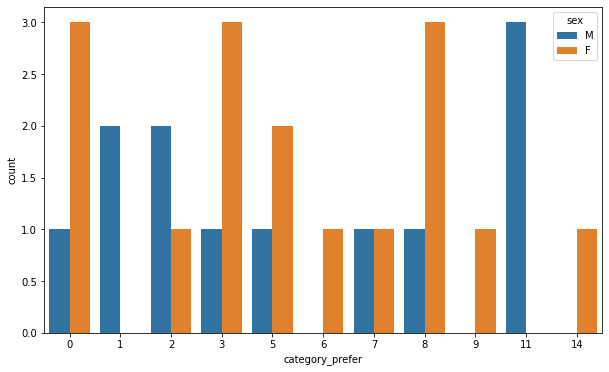

In [31]:
plt.subplots(figsize = (10,6))
sns.countplot('category_prefer', hue = 'sex', data =churn_meta_df_eda )

#### 탈퇴한 회원의 멤버십 타입은?

* 비회원인 회원이 탈퇴할 가능성이 높음 

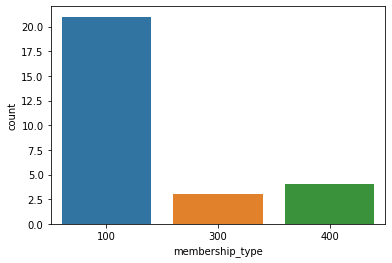

In [32]:
sns.countplot(data = churn_meta_df_eda, x = 'membership_type')

# > 역시 비회원이 제일 많음 

#### 탈퇴자는 몇년 고객이 많을까? 

In [33]:
# deleted_date	데이터 변환
churn_meta_df_eda['deleted_date'] = churn_meta_df_eda['deleted_date'].astype('datetime64')

# 일수 계산 
churn_meta_df_eda['from_mem_to_exit'] = churn_meta_df_eda['deleted_date'] - churn_meta_df_eda['joined_date']
churn_meta_df_eda['from_mem_to_exit']


# 음수가 나오는 회원의 경우 1) 오류인걸까  2) 탈퇴후 재가입한 경우일까  : meta data만으로는 확인이 불가능 
# > 마지막 거래 일자를 보면 되려나 

116     505 days
264    1629 days
276     905 days
311    1040 days
602     545 days
672     127 days
725     164 days
769     895 days
810     421 days
1188    -51 days
1322    174 days
1416   -268 days
1507    790 days
1710   -293 days
1731   1139 days
1895     84 days
2133   -196 days
2250    403 days
2285    329 days
2317    268 days
2395    497 days
2558    -44 days
2755    638 days
2777    422 days
2969    242 days
3033    285 days
3105   -112 days
3290    888 days
Name: from_mem_to_exit, dtype: timedelta64[ns]

In [34]:
# 이탈자 고객의 탈퇴 일이 가입 일보다 빠른 경우, 마지막 거래일자 확인하기 

# 1. 해당 고객 구분
wrong_user_id = list(churn_meta_df_eda[churn_meta_df_eda['joined_date'] > churn_meta_df_eda['deleted_date'] ]['user_id'].values)
wrong_user_id
wrong_index = list(churn_meta_df_eda[churn_meta_df_eda['joined_date'] > churn_meta_df_eda['deleted_date'] ]['user_id'].index)

In [35]:
# 가입일, 탈퇴일 가져오기 
wrong_date = meta_df_eda.iloc[wrong_index, :][['user_id', 'joined_date', 'deleted_date']]

# 고객 거래 데이터 가져오기 
wrong_last_date = stats_df[ stats_df['user_id'].isin(wrong_user_id)][['user_id', 'last_date']]

# 한번에 보기 
pd.merge(wrong_date ,wrong_last_date , on = 'user_id')


#  재가입한 손님일 가능성이 높음. 그렇다면 재가입한 손님이라는 표기를 따로 해주는게 낫지 않을까? 


,user_id,joined_date,deleted_date,last_date
0,Rm5hvkXdhXUSYHB,2020-07-13,2020-05-23,2020-03-10
1,bDgeTHf50AdQ7g1,2020-11-09,2020-02-15,2020-01-13
2,p5dHCIxFm7i4KBQ,2020-12-21,2020-03-03,2020-01-19
3,HhXlmI7xR56GNj1,2020-10-15,2020-04-02,2020-01-06
4,FeIw6J2Tjb1kwTx,2020-07-06,2020-05-23,2020-01-03
5,23Qo3NKgLaeKOky,2020-05-29,2020-02-07,2020-01-22


In [36]:
# 다시 돌아와서 탈퇴 기간 

# 숫자가 상대적으로 크다보니 연으로 변경 

churn_meta_df_eda['from_mem_to_exit'] = churn_meta_df_eda['from_mem_to_exit']/ np.timedelta64(1,'Y')

In [37]:
churn_meta_df_eda['from_mem_to_exit'] = churn_meta_df_eda['from_mem_to_exit'].round()
churn_meta_df_eda.head()

,user_id,sex,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn,age,age_level,days_join,years_join,from_mem_to_exit
116,cjd4wSUICQMEA3U,M,400,11,2019-06-24,2020-11-10,direct,AOS,2,churn,27,2,557,2.0,1.0
264,KF3dIVZxFwjd3Xg,M,400,1,2016-05-31,2020-11-15,direct,AOS,2,churn,40,4,1676,5.0,4.0
276,WWeSy5BIAFA5dNy,F,400,3,2018-05-21,2020-11-11,sns,IOS,8,churn,29,2,956,3.0,2.0
311,oyr22HLPrtEAKCY,M,300,2,2018-02-05,2020-12-11,direct,IOS,1,churn,28,2,1061,3.0,3.0
602,X2WyYt6GEVWhg5Q,F,300,5,2019-06-03,2020-11-29,direct,IOS,1,churn,38,3,578,2.0,1.0


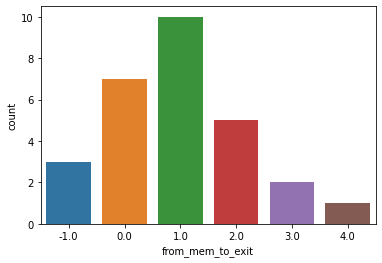

In [38]:
sns.countplot(x ='from_mem_to_exit' , data = churn_meta_df_eda)

# > 이탈자의 상당수가 1년 이상 2년 이하의 고객. 

#### 탈퇴한 회원의 가입경로

 * 이탈자의 약 93% 가 direct로 가입했던사람

direct    92.857143
sns        7.142857
Name: join_path, dtype: float64

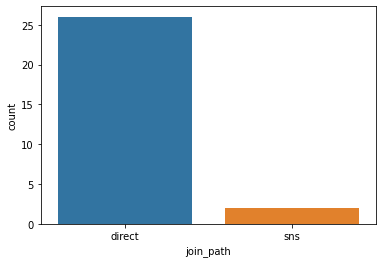

In [39]:
sns.countplot(data = churn_meta_df_eda, x = 'join_path')

(churn_meta_df_eda['join_path'].value_counts()/ 28)*100

# direct 가입이 많음 

#### 친구추천이 없겠지?  

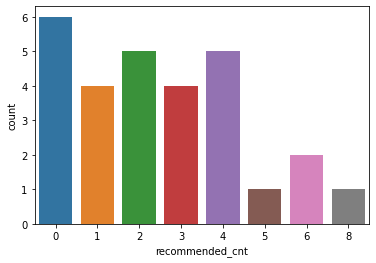

In [40]:
sns.countplot(data = churn_meta_df_eda, x ='recommended_cnt' )

# > 은근 많네 

### 성별별 분석 

 * 여성 고객은 어떤 카테고리를 좋아할까 ? 
 * 멤버십 타입별 성비 구성은 ? 

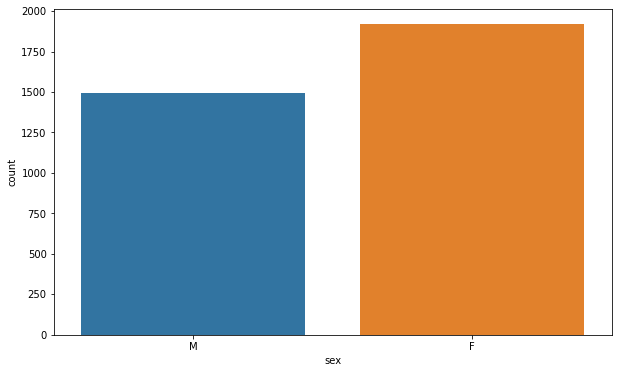

In [41]:
#성비구성
plt.subplots(figsize = (10,6))
sns.countplot(x = 'sex', data =meta_df_eda )

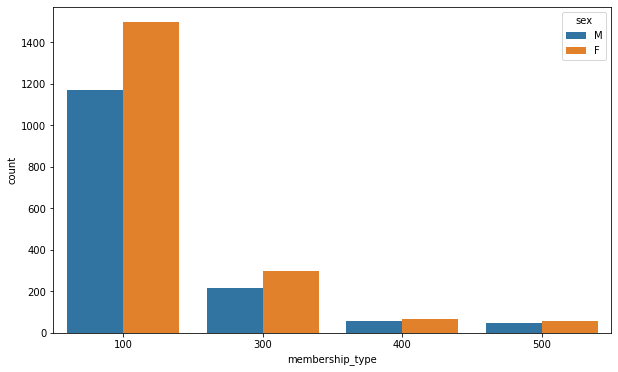

In [42]:
plt.subplots(figsize = (10,6))
sns.countplot('membership_type', hue = 'sex', data =meta_df_eda )

# 4-500 멤버십에 성비는 차이가 거의 없다. 

### 연령대별 분석

1. 연령대별 고객 수 : 20대가 가장 많다 

In [43]:
meta_df_eda.groupby('age_level').count()[['user_id']]

,user_id
age_level,
1,14
2,1728
3,998
4,618
5,54


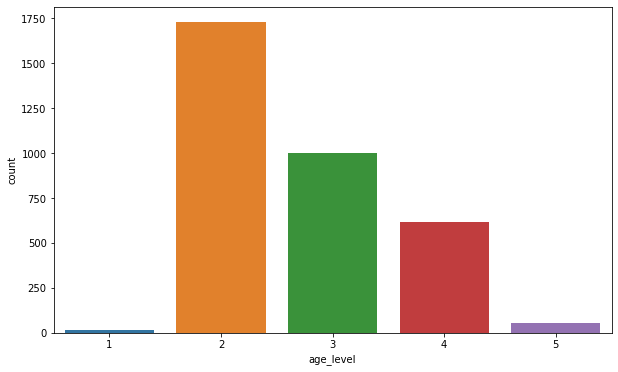

In [44]:
plt.subplots(figsize = (10,6))
sns.countplot('age_level', data =meta_df_eda )

### 가입기간에 따른 고객 분포 

 * 1년차 고객이 제일 많다 

In [45]:
meta_df_eda['years_join'].min(), meta_df_eda['years_join'].max()

(0.0, 5.0)

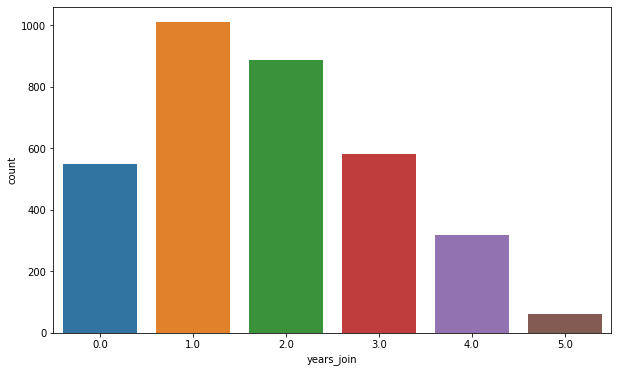

In [46]:
plt.subplots(figsize = (10,6))
sns.countplot(data = meta_df_eda, x = 'years_join')

In [47]:
# px.bar로 표현해보기 
df = meta_df_eda.groupby('years_join')[['user_id']].count().reset_index()

fig = px.bar(df , x = 'years_join', y = 'user_id')
fig.update_layout(height = 500, width = 1000)
fig.show()

### 카테고리 선호 입력수에 따른 고객 분포 확인 

 * 선호 카테고리를 입력하지 않은 고객(0)이 제일 많고 ,  6번 이하로 많이 입력한다 

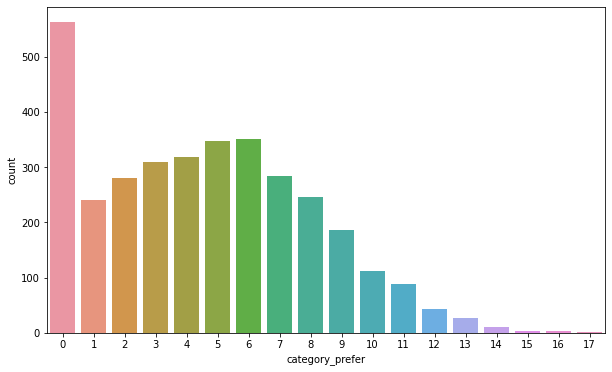

In [48]:
plt.subplots(figsize = (10,6))
sns.countplot(data = meta_df_eda, x = 'category_prefer')

### 친구추천 횟수에 따른 고객 분포 

 * 친구추천이 0 인 고객이 가장 많고 1~3회 정도 추천을 많이 함을 알 수 있다 

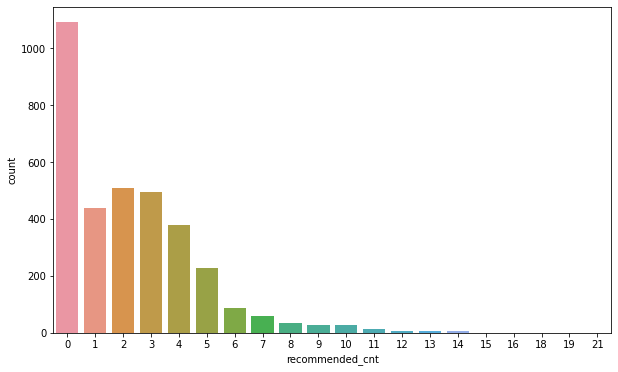

In [49]:
plt.subplots(figsize = (10,6))
sns.countplot(data = meta_df_eda, x = 'recommended_cnt')

In [50]:
# 다른방법으로 시각화 
df = meta_df_eda.groupby('recommended_cnt')[['user_id']].count().reset_index()
fig = px.bar(df, x='recommended_cnt', y='user_id')
fig.update_layout(height=500, width=1000)
fig.show()

### 각 변수별 상관관계 살펴보기 

* category_prefer과 나이 사이에 음의 상관관계가 있다 

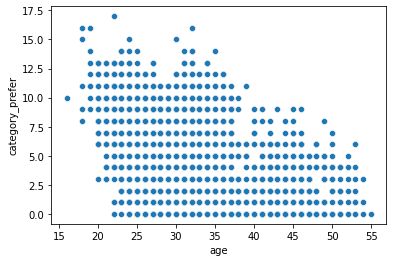

In [56]:
# 연령별 추천횟수 
sns.scatterplot(x = 'age', y = 'category_prefer', data = meta_df_eda)

In [57]:
corr_m = meta_df_eda.corr()
corr_m[abs(corr_m) >=0.3]

,membership_type,category_prefer,recommended_cnt,age,age_level,days_join,years_join
membership_type,1.0,NaN,NaN,NaN,NaN,NaN,NaN
category_prefer,NaN,1.000000,NaN,-0.504292,-0.439879,NaN,NaN
recommended_cnt,NaN,NaN,1.0,NaN,NaN,NaN,NaN
age,NaN,-0.504292,NaN,1.000000,0.943017,NaN,NaN
age_level,NaN,-0.439879,NaN,0.943017,1.000000,NaN,NaN
days_join,NaN,NaN,NaN,NaN,NaN,1.000000,0.974716
years_join,NaN,NaN,NaN,NaN,NaN,0.974716,1.000000


In [58]:
#시각적으로 보기 
corr_m.style.background_gradient()

,membership_type,category_prefer,recommended_cnt,age,age_level,days_join,years_join
membership_type,1.000000,-0.053046,-0.021604,0.069491,0.062597,0.037165,0.034349
category_prefer,-0.053046,1.000000,0.171625,-0.504292,-0.439879,-0.007478,-0.004093
recommended_cnt,-0.021604,0.171625,1.000000,-0.258950,-0.209633,0.186742,0.182535
age,0.069491,-0.504292,-0.258950,1.000000,0.943017,0.138338,0.135236
age_level,0.062597,-0.439879,-0.209633,0.943017,1.000000,0.166829,0.162286
days_join,0.037165,-0.007478,0.186742,0.138338,0.166829,1.000000,0.974716
years_join,0.034349,-0.004093,0.182535,0.135236,0.162286,0.974716,1.000000


#### age와 category_prefer scatterplot 관계 시각화

 * 10대  ~ 20대 초반이 40대 이상보단 선호 카테고리를 많이 입력한다 

In [59]:
fig = px.scatter(x= meta_df_eda.age, y=meta_df_eda.category_prefer)
fig.update_layout(width=600, height=500)
fig.show()

## 거래데이터 EDA

In [105]:
stats_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,dayofRecency
count,3407.000000,3407.000000,3.407000e+03,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000
mean,153.654241,8.928089,3.426238e+05,-563.321137,-50.127922,1.252557,2.311584,31793.669586,20170.017986,84.179924
std,107.022924,21.472328,1.042207e+06,1262.959643,745.528054,0.656496,3.487079,14944.793402,15069.956295,63.316944
min,100.000000,1.000000,0.000000e+00,-10000.000000,-27000.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,100.000000,1.000000,2.500000e+04,-472.136223,0.000000,1.000000,1.000000,22275.000000,8950.000000,28.000000
50%,100.000000,1.000000,3.700000e+04,0.000000,0.000000,1.000000,1.000000,30000.000000,19500.000000,67.000000
75%,100.000000,2.000000,5.955000e+04,0.000000,0.000000,1.000000,2.000000,39500.000000,30000.000000,154.000000
90%,300.000000,30.000000,1.112338e+06,0.000000,0.000000,2.000000,5.600000,47500.000000,39000.000000,179.000000
99%,500.000000,100.760000,3.884388e+06,0.000000,0.000000,3.891286,17.000000,79341.370400,64980.666800,182.000000
max,500.000000,248.000000,2.825470e+07,0.000000,0.000000,8.551724,41.333333,324766.670000,96107.140000,182.000000


In [100]:
stats_df.corr().style.background_gradient()

,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,dayofRecency
membership_type,1.000000,0.769423,0.646589,-0.077827,0.032228,0.709109,0.754484,0.254052,0.169323,0.683835
total_order_cnt,0.769423,1.000000,0.843686,-0.073419,0.023586,0.918367,0.981333,0.183186,0.169343,0.525872
total_cost,0.646589,0.843686,1.000000,-0.048444,0.019868,0.788497,0.827697,0.411744,0.230991,0.430106
avg_coupon_amt,-0.077827,-0.073419,-0.048444,1.000000,0.215102,-0.057500,-0.065842,0.022810,0.000991,-0.052991
avg_point_amt,0.032228,0.023586,0.019868,0.215102,1.000000,0.025330,0.024703,0.037515,0.006214,0.027303
weekly_order_cnt,0.709109,0.918367,0.788497,-0.057500,0.025330,1.000000,0.955018,0.171933,0.149649,0.457879
monthly_order_cnt,0.754484,0.981333,0.827697,-0.065842,0.024703,0.955018,1.000000,0.176046,0.165932,0.500720
avg_cost,0.254052,0.183186,0.411744,0.022810,0.037515,0.171933,0.176046,1.000000,0.584198,0.062322
avg_item_cost,0.169323,0.169343,0.230991,0.000991,0.006214,0.149649,0.165932,0.584198,1.000000,0.015116
dayofRecency,0.683835,0.525872,0.430106,-0.052991,0.027303,0.457879,0.500720,0.062322,0.015116,1.000000


In [110]:
corr_m = stats_df.corr()
corr_m[abs(corr_m) >=0.5]

,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,dayofRecency
membership_type,1.000000,0.769423,0.646589,NaN,NaN,0.709109,0.754484,NaN,NaN,0.683835
total_order_cnt,0.769423,1.000000,0.843686,NaN,NaN,0.918367,0.981333,NaN,NaN,0.525872
total_cost,0.646589,0.843686,1.000000,NaN,NaN,0.788497,0.827697,NaN,NaN,NaN
avg_coupon_amt,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
avg_point_amt,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
weekly_order_cnt,0.709109,0.918367,0.788497,NaN,NaN,1.000000,0.955018,NaN,NaN,NaN
monthly_order_cnt,0.754484,0.981333,0.827697,NaN,NaN,0.955018,1.000000,NaN,NaN,0.500720
avg_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.584198,NaN
avg_item_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.584198,1.000000,NaN
dayofRecency,0.683835,0.525872,NaN,NaN,NaN,NaN,0.500720,NaN,NaN,1.000000


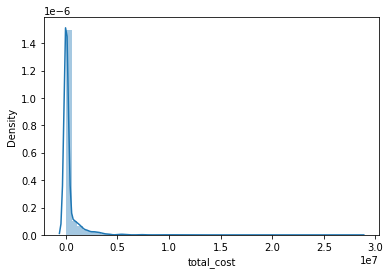

In [108]:
sns.distplot(stats_df['total_cost'],  kde = True)

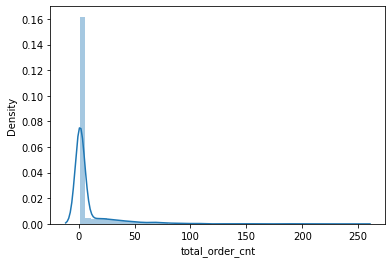

In [103]:
sns.distplot(stats_df['total_order_cnt'])

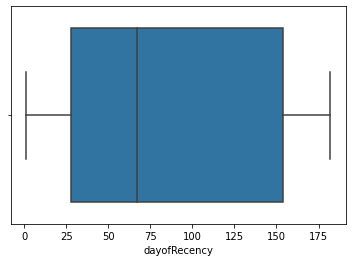

In [104]:
sns.boxplot(stats_df['dayofRecency'])

# 메타 데이터 + 거래데이터 

In [61]:
pd.set_option('display.max_columns', 24)                       # 출력할 열의 최대개수                  
pd.set_option('display.unicode.east_asian_width', True)   # 출력할 열의 너비

In [62]:
# 메타 데이터와 거래데이터 합치기 

meta_df_eda.shape, stats_df.shape

((3412, 14), (3412, 12))

In [114]:
# 병합하기 
final = pd.merge(meta_df_eda,stats_df, on = 'user_id' )
final

,user_id,sex,membership_type_x,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn,age,age_level,...,years_join,membership_type_y,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,dayofRecency
0,KjIRvUKVTgxGaek,M,300,3,2019-09-09,NaT,direct,AOS,4,member,27,2,...,1.0,100,1.0,22500.0,0.000000,0.0,1.000000,1.0,22500.00,17000.0,2020-06-11,163
1,QWhJIG1fOkhUJzG,F,300,2,2020-04-13,NaT,direct,AOS,1,member,27,2,...,1.0,300,12.0,356300.0,-166.666667,0.0,1.333333,2.4,29691.67,26775.0,2020-06-11,163
2,5UD76uKfYNPTliG,F,300,4,2018-12-18,NaT,direct,AOS,6,member,23,2,...,2.0,100,1.0,23500.0,-3000.000000,0.0,1.000000,1.0,23500.00,16500.0,2020-01-04,4
3,lfpxRIsbmmt6mUQ,M,300,7,2019-01-16,NaT,direct,AOS,2,member,24,2,...,2.0,100,1.0,26000.0,-5000.000000,0.0,1.000000,1.0,26000.00,20000.0,2020-01-02,2
4,djGLdEHvJy17TDX,F,300,6,2019-11-06,NaT,direct,AOS,2,member,23,2,...,1.0,100,1.0,10200.0,0.000000,0.0,1.000000,1.0,10200.00,10200.0,2020-01-18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,ZX2KUvYkoyNrfJc,M,100,8,2019-06-24,NaT,direct,IOS,1,member,33,3,...,2.0,100,1.0,69500.0,0.000000,0.0,1.000000,1.0,69500.00,68000.0,2020-01-07,7
3403,Z6xlU0p1jklW2vM,F,100,0,2018-07-15,NaT,direct,IOS,7,member,41,4,...,2.0,100,1.0,50000.0,0.000000,0.0,1.000000,1.0,50000.00,48000.0,2020-01-19,19
3404,62RcGYkl6KjwGLH,M,100,7,2019-07-07,NaT,direct,AOS,1,member,24,2,...,1.0,100,1.0,35000.0,0.000000,0.0,1.000000,1.0,35000.00,0.0,2020-01-16,16
3405,iH51VLtCAggY7P7,F,100,8,2018-02-02,NaT,direct,AOS,3,member,24,2,...,3.0,100,1.0,51500.0,0.000000,0.0,1.000000,1.0,51500.00,50000.0,2020-01-05,5


### 병합한 데이터 확인하기 

In [64]:
final.isnull().sum()

user_id              0
sex                  0
membership_type_x    0
category_prefer      0
joined_date          0
deleted_date         0
join_path            0
os                   0
recommended_cnt      0
churn                0
age                  0
age_level            0
days_join            0
years_join           0
membership_type_y    0
total_order_cnt      0
total_cost           0
avg_coupon_amt       0
avg_point_amt        0
weekly_order_cnt     0
monthly_order_cnt    0
avg_cost             0
avg_item_cost        0
last_date            0
dayofRecency         0
dtype: int64

In [65]:
# 거래가 없는 meta_dataset 의 user_id 확인 
set(meta_df_eda['user_id'].unique()) - set(stats_df['user_id'].unique()) # 5개

{'8WI83Ev0nnBfMB7',
 'EgkSw32Hq7ueGrf',
 'K0qchcNENCEDzPH',
 'jat1krEScInB0Hx',
 'wvzkibB8S2Oth9b'}

In [66]:
final.head()
final.to_excel('고객메타거래데이터.xlsx') #저장 

In [67]:
final.columns

Index(['user_id', 'sex', 'membership_type_x', 'category_prefer', 'joined_date',
       'deleted_date', 'join_path', 'os', 'recommended_cnt', 'churn', 'age',
       'age_level', 'days_join', 'years_join', 'membership_type_y',
       'total_order_cnt', 'total_cost', 'avg_coupon_amt', 'avg_point_amt',
       'weekly_order_cnt', 'monthly_order_cnt', 'avg_cost', 'avg_item_cost',
       'last_date', 'dayofRecency'],
      dtype='object')

### 멤버십타입 비교하기 

In [115]:
final[final.membership_type_x != final.membership_type_y]

# 동일 고객의 메타 데이터 membership_type와 거래 데이터의 membership_type이 다르다 > 거래할때의 멤버십타입이라 다른걸로 예상. 

,user_id,sex,membership_type_x,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn,age,age_level,...,years_join,membership_type_y,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,dayofRecency
0,KjIRvUKVTgxGaek,M,300,3,2019-09-09,NaT,direct,AOS,4,member,27,2,...,1.0,100,1.0,22500.0,0.000000,0.0,1.0,1.0,22500.00,17000.00,2020-06-11,163
2,5UD76uKfYNPTliG,F,300,4,2018-12-18,NaT,direct,AOS,6,member,23,2,...,2.0,100,1.0,23500.0,-3000.000000,0.0,1.0,1.0,23500.00,16500.00,2020-01-04,4
3,lfpxRIsbmmt6mUQ,M,300,7,2019-01-16,NaT,direct,AOS,2,member,24,2,...,2.0,100,1.0,26000.0,-5000.000000,0.0,1.0,1.0,26000.00,20000.00,2020-01-02,2
4,djGLdEHvJy17TDX,F,300,6,2019-11-06,NaT,direct,AOS,2,member,23,2,...,1.0,100,1.0,10200.0,0.000000,0.0,1.0,1.0,10200.00,10200.00,2020-01-18,18
5,qTDYzF4LqurtJVN,M,300,1,2020-09-26,NaT,direct,AOS,0,member,27,2,...,0.0,100,1.0,13850.0,0.000000,-130.0,1.0,1.0,13850.00,10350.00,2020-02-13,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,216izs1EVvd6qem,F,100,12,2019-11-10,NaT,direct,IOS,4,member,33,3,...,1.0,300,3.0,72220.0,-1666.666667,0.0,1.0,1.5,24073.33,11566.67,2020-02-29,60
3010,zBOBgZ12GytoGXJ,F,100,7,2019-12-13,NaT,direct,AOS,4,member,26,2,...,1.0,300,2.0,62500.0,0.000000,0.0,1.0,1.0,31250.00,18500.00,2020-05-28,149
3141,kajpBazHGkLPqMd,M,100,1,2019-06-06,NaT,direct,IOS,2,member,26,2,...,2.0,300,2.0,46900.0,0.000000,0.0,1.0,2.0,23450.00,18200.00,2020-06-17,169
3366,rTnSabbuevJmgq8,M,100,3,2017-01-19,NaT,sns,IOS,4,member,33,3,...,4.0,300,1.0,16000.0,0.000000,0.0,1.0,1.0,16000.00,9000.00,2020-05-16,137


,total_cost
count,5.300000e+02
mean,1.608242e+06
std,1.979795e+06
min,1.160000e+04
25%,5.273750e+05
50%,1.130100e+06
75%,2.108600e+06
max,2.825470e+07


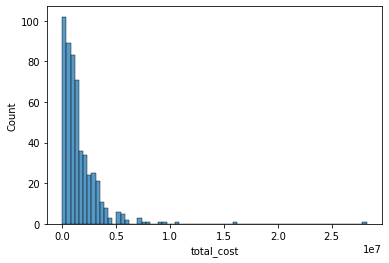

In [118]:
df = final[final.membership_type_x < final.membership_type_y][['total_cost']]


sns.histplot(data = df, x = 'total_cost')
df.describe()

,total_cost
count,5.430000e+02
mean,1.519111e+05
std,3.800867e+05
min,0.000000e+00
25%,2.250000e+04
50%,3.010000e+04
75%,4.600000e+04
max,2.869940e+06


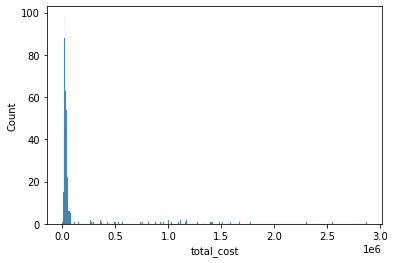

In [119]:
df = final[final.membership_type_x > final.membership_type_y][['total_cost']]

# 고객의 멤버십타입이 거래데이터의 멤버십타입보다 큰 경우의 Recency 및 다른 컬럼들을 살펴보니, 반대일경우보다 적었다. 즉, 최근 거래를 덜 했다는 뜻. 

sns.histplot(data = df, x = 'total_cost')
df.describe()

* 어떤 멤버십타입을 삭제해야할까 ?
 * 데이터 설명을 보면, 100은 비회원 고객
 * 거래데이터 내 멤버십타입이 더 큰 고객의 dayofRecency가 더 크다(최근까지 구매한 고객). 
 * 때문에 거래 데이터 내 멤버십타입(membership_type_y)를 남기고 membership_type_x를 제거 
  

In [71]:
final.drop(columns ='membership_type_x', inplace = True )

3~5년 user 중 탈퇴 고객의 거래 분석 

In [73]:
final.loc[[264, 311, 1731]]

,user_id,sex,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,churn,age,age_level,days_join,years_join,membership_type_y,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,dayofRecency
264,KF3dIVZxFwjd3Xg,M,1,2016-05-31,2020-11-15,direct,AOS,2,churn,40,4,1676,5.0,100,1.0,37500.0,0.0,0.0,1.0,1.0,37500.0,22000.0,2020-01-14,14
311,oyr22HLPrtEAKCY,M,2,2018-02-05,2020-12-11,direct,IOS,1,churn,28,2,1061,3.0,100,2.0,70500.0,0.0,0.0,1.0,2.0,35250.0,30750.0,2020-01-26,26
1731,7WcH4DI5B2X13v6,F,6,2017-03-11,2020-04-23,direct,AOS,6,churn,31,3,1392,4.0,100,1.0,44500.0,0.0,0.0,1.0,1.0,44500.0,0.0,2020-01-06,6


In [74]:
np.mean(final.dayofRecency)

84.17992368652774